In [17]:
import numpy as np
import cv2

from PIL import Image
import PIL.Image as image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda

In [20]:
# IMAGE_SHAPE = (224, 224)

# classifier = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
# ])
IMAGE_SHAPE = (224, 224)

model = Sequential([
    Lambda(
        lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")(x),
        input_shape=IMAGE_SHAPE + (3,)
    ),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

IMAGE_SHAPE = (224, 224)

# Load feature extractor
feature_extractor_layer = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE + (3,),
    trainable=False
)

# Functional API model
inputs = tf.keras.Input(shape=IMAGE_SHAPE + (3,))
x = feature_extractor_layer(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


ValueError: Exception encountered when calling layer 'keras_layer_6' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_6' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_13>
  • training=None

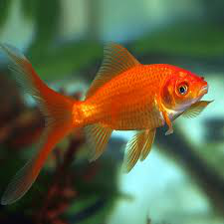

In [25]:
gold_fish = Image.open("goldfish.jfif").resize(IMAGE_SHAPE)
gold_fish

In [26]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape #Now we convert the image into 0 to 1 range. And also we convert it into an array

(224, 224, 3)

In [27]:
gold_fish[np.newaxis, ...].shape #By doing this we are adding one new dimension

(1, 224, 224, 3)

In [30]:
result = model.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 1)

In [31]:
predicted_label_index = np.argmax(result)
predicted_label_index

0

In [33]:
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [34]:
image_labels[predicted_label_index]

'background'

In [40]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 197s 1us/step


In [41]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [49]:
list(data_dir.glob('flower_photos/*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [50]:
image_count = len(list(data_dir.glob('flower_photos/*/*.jpg')))
print(image_count) #this will show the total images in all the folders.
#after flower_photos/*: this will take all folder which are in the flower_photos directory

3670


In [54]:
tulips = list(data_dir.glob('flower_photos/tulips/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [46]:
roses = list(data_dir.glob('flower_photos/roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

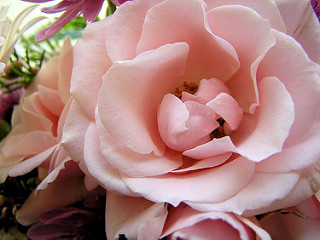

In [53]:
Image.open(roses[15])

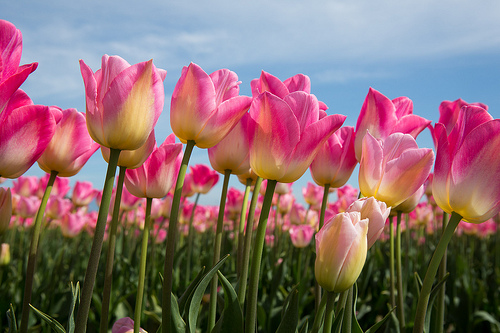

In [59]:
Image.open(tulips[3])

In [60]:
flower_image_dict = {
    'roses': list(data_dir.glob('flower_photos/roses/*')),
    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
    'tulips': list(data_dir.glob('flower_photos/tulips/*')),
}
#saving in a dict for X and y train_test_split.

In [61]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'tulips': 3,
}

In [63]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [64]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [65]:
X, y = [], []
#in this for loop all images will be of same size. first it is taking a img on first line the giving it cv2.resize. and then in X directory
#we append resized_img to the X directory
#in y directory we append class roses: 0 as by
for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [66]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [67]:
X = np.array(X)
y = np.array(y)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

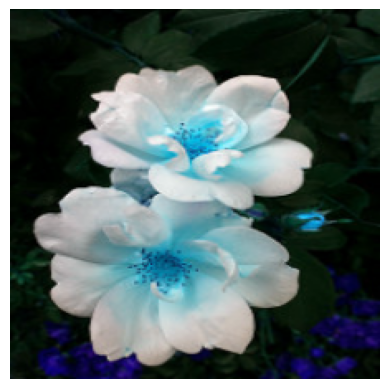

In [72]:
plt.axis('off')
plt.imshow(X[0])

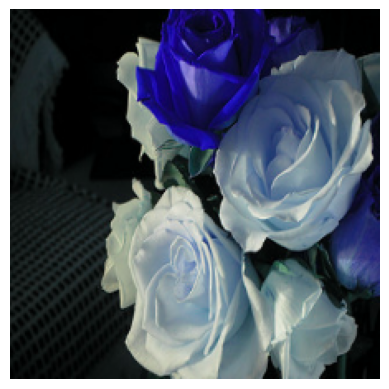

In [73]:
plt.axis('off')
plt.imshow(X[1])

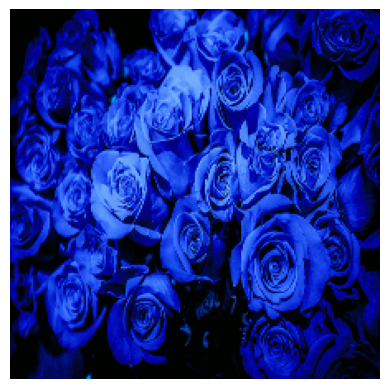

In [74]:
plt.axis('off')
plt.imshow(X[2])

In [75]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [83]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False
)

In [84]:
model = Sequential([
    feature_extractor_layer,
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x0000011AC8F33A10> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [78]:
num_of_flowers = 5

model = Sequential([
  pretrained_model_without_top_layer,
  Dense(num_of_flowers)
])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x0000011A9258CE30> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [85]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\abbas\AppData\Local\Temp\ipykernel_12488\2648815267.py", line 6, in <module>

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 690, in __call__

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 699, in call

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 2246, in sparse_categorical_crossentropy

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1964, in sparse_categorical_crossentropy

  File "C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 3 which is outside the valid range of [0, 1).  Label values: 0 3 1 2 0 3 1 2 2 2 3 0 2 2 1 1 1 0 3 1 0 1 3 1 3 2 0 3 2 2 1 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_138732]